# Методы кластеризации и обучение на неразмеченных данных

## Библиотеки

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from copy import deepcopy
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.spatial.distance import cdist
from scipy import stats
import numpy as np
from sklearn import tree, base
import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, BaggingClassifier)
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.datasets import make_classification, make_regression, load_wine, load_boston
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torchvision import datasets, transforms
import torch

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
colors = ['blue', 'red', 'green', 'orange', 'magenta', 'black', 'cyan', 'purple']

## Задача кластеризации

Дано:
- $X$ --- пространство объектов
- $X^l = \{x_1, \cdots, x_l\}$ --- обучающая выборка
- $\rho: X\times X \to [, )$ --- функция расстояния

Найти:
- $Y$ --- множество кластеров
- $a: X \to Y$ --- алгоритм кластеризации
    - каждый класстер состоит из близкихобъектов
    - объекты разных кластеров существенно различны.

## Примеры

In [4]:
np.random.seed(0)
l = 500
X_1 = np.random.dirichlet([1e-3, 1e-3], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-3, 1e-3], size = l) \
      + 1e-1*np.random.randn(l, 2)

X = np.vstack([X_1, X_2])

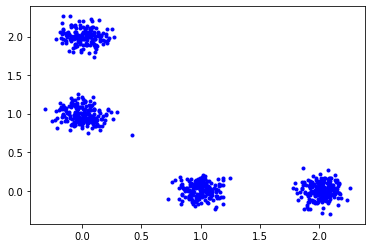

In [5]:
_ = plt.plot(X[:, 0], X[:, 1], '.', color=colors[0])

plt.show()

In [6]:
np.random.seed(0)
l = 500
X_1 = np.random.dirichlet([1e-2, 1e-2], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-2, 1e-2], size = l) \
      + 1e-1*np.random.randn(l, 2)

X = np.vstack([X_1, X_2])

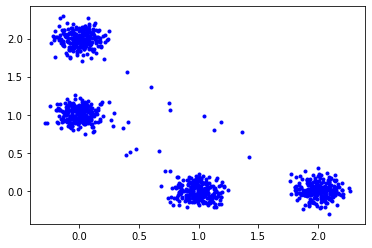

In [7]:
_ = plt.plot(X[:, 0], X[:, 1], '.', color=colors[0])

plt.show()

In [8]:
np.random.seed(0)
l = 500
X_1 = np.random.dirichlet([1e-1, 1e-1], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-1, 1e-1], size = l) \
      + 1e-1*np.random.randn(l, 2)

X = np.vstack([X_1, X_2])

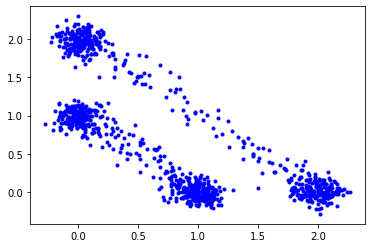

In [9]:
_ = plt.plot(X[:, 0], X[:, 1], '.', color=colors[0])

plt.show()

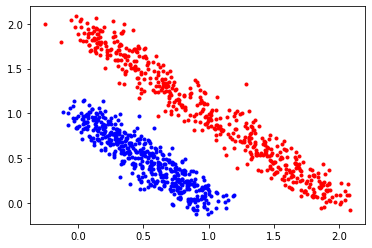

In [10]:
np.random.seed(0)
l = 500
X_1 = np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)

_ = plt.plot(X_1[:, 0], X_1[:, 1], '.', color=colors[0])
_ = plt.plot(X_2[:, 0], X_2[:, 1], '.', color=colors[1])

plt.show()

## K-Means

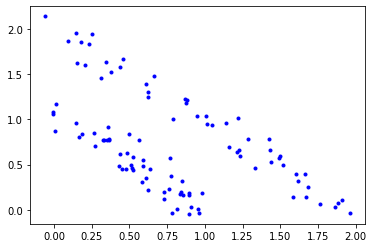

In [11]:
np.random.seed(0)
l = 50
X_1 = np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)

X = np.vstack([X_1, X_2])

_ = plt.plot(X[:, 0], X[:, 1], '.', color=colors[0])
plt.show()

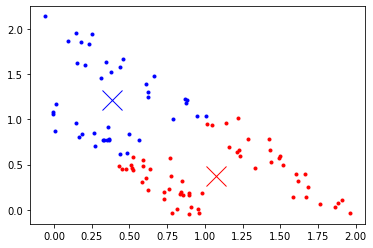

In [12]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])
    _ = plt.plot([model.cluster_centers_[i][0]], 
                 [model.cluster_centers_[i][1]], 'x', c=colors[i], markersize=20)

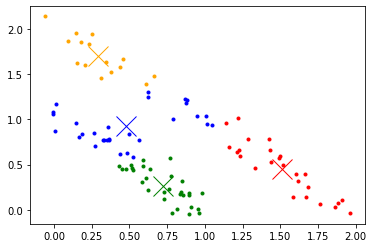

In [13]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])
    _ = plt.plot([model.cluster_centers_[i][0]], 
                 [model.cluster_centers_[i][1]], 'x', c=colors[i], markersize=20)

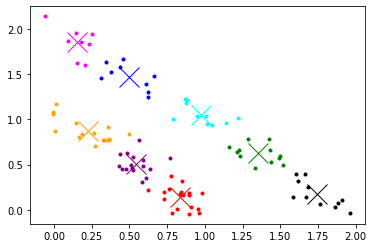

In [14]:
model = KMeans(n_clusters=8, random_state=42)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])
    _ = plt.plot([model.cluster_centers_[i][0]], 
                 [model.cluster_centers_[i][1]], 'x', c=colors[i], markersize=20)


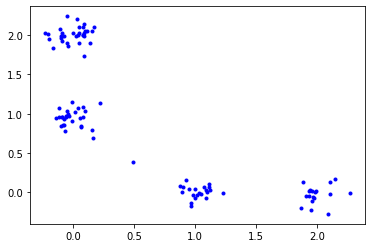

In [15]:
np.random.seed(0)
l = 50
X_1 = np.random.dirichlet([1e-2, 1e-2], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-2, 1e-2], size = l) \
      + 1e-1*np.random.randn(l, 2)

X = np.vstack([X_1, X_2])

_ = plt.plot(X[:, 0], X[:, 1], '.', color=colors[0])
plt.show()

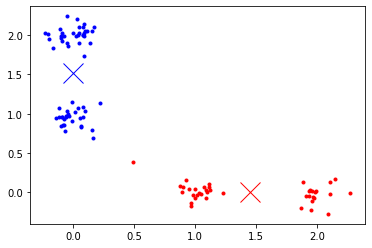

In [16]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])
    _ = plt.plot([model.cluster_centers_[i][0]], 
                 [model.cluster_centers_[i][1]], 'x', c=colors[i], markersize=20)

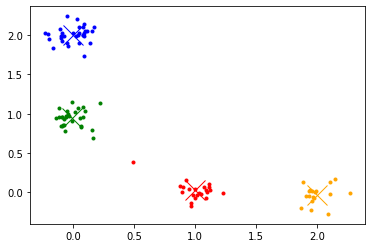

In [17]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])
    _ = plt.plot([model.cluster_centers_[i][0]], 
                 [model.cluster_centers_[i][1]], 'x', c=colors[i], markersize=20)

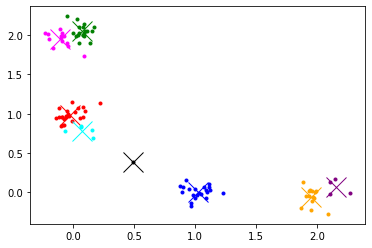

In [18]:
model = KMeans(n_clusters=8, random_state=42)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])
    _ = plt.plot([model.cluster_centers_[i][0]], 
                 [model.cluster_centers_[i][1]], 'x', c=colors[i], markersize=20)

### Ограничения

Работает с Евклидовой метрикой и только!

## DBSCAN

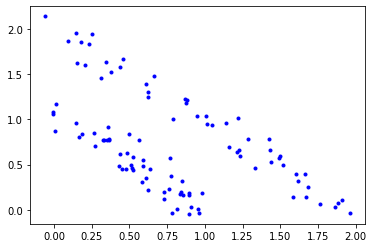

In [19]:
np.random.seed(0)
l = 50
X_1 = np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)

X = np.vstack([X_1, X_2])

_ = plt.plot(X[:, 0], X[:, 1], '.', color=colors[0])
plt.show()

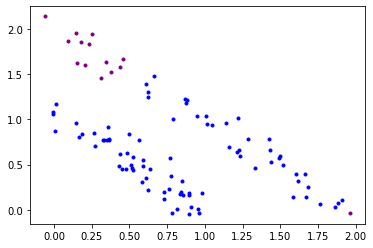

In [20]:
model = DBSCAN(0.5, min_samples=20)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])

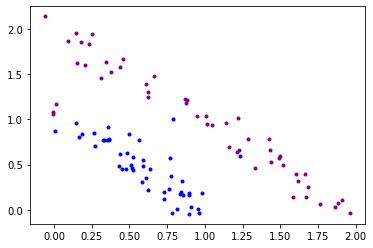

In [21]:
model = DBSCAN(0.5, min_samples=20, metric='minkowski', p=1)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])

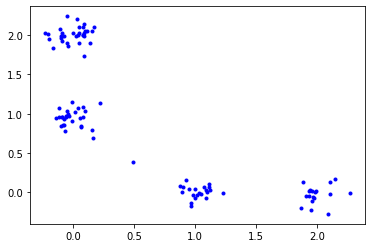

In [22]:
np.random.seed(0)
l = 50
X_1 = np.random.dirichlet([1e-2, 1e-2], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-2, 1e-2], size = l) \
      + 1e-1*np.random.randn(l, 2)

X = np.vstack([X_1, X_2])

_ = plt.plot(X[:, 0], X[:, 1], '.', color=colors[0])
plt.show()

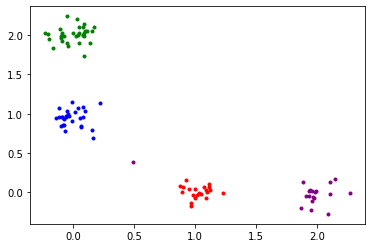

In [23]:
model = DBSCAN(0.5, min_samples=20, metric='minkowski', p=1)
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])

## Иерархическая кластеризация (Ланс, Уильямс, 1967)

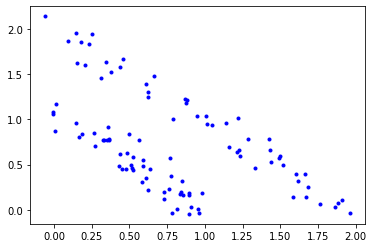

In [24]:
np.random.seed(0)
l = 50
X_1 = np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)

X = np.vstack([X_1, X_2])

_ = plt.plot(X[:, 0], X[:, 1], '.', color=colors[0])
plt.show()

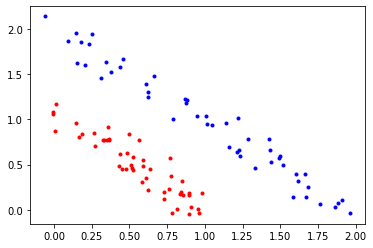

In [25]:
model = AgglomerativeClustering(n_clusters=2, affinity='l1', linkage='single')
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])

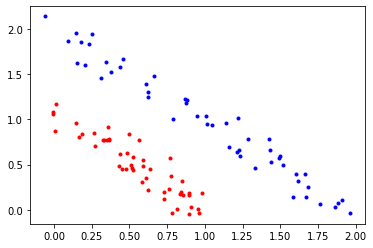

In [26]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])

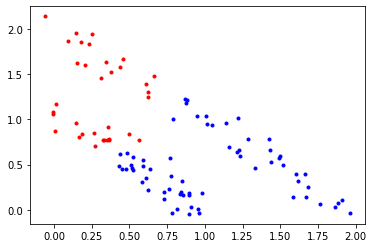

In [27]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])

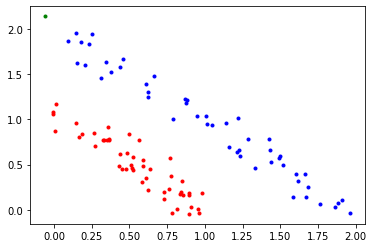

In [28]:
model = AgglomerativeClustering(distance_threshold=0.35, n_clusters=None, affinity='l1', linkage='single')
model.fit(X)

for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i])

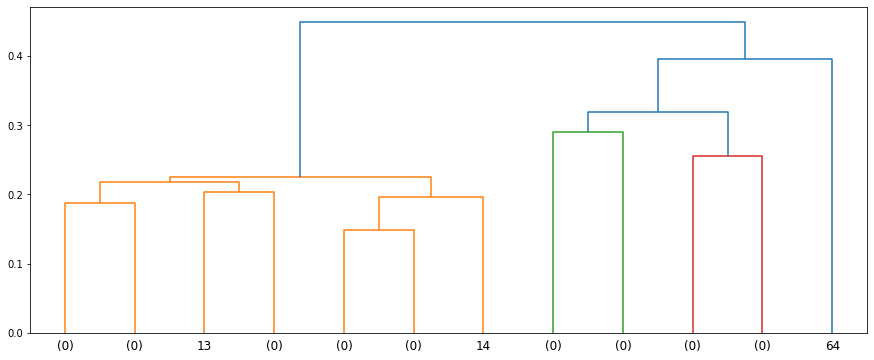

In [29]:
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

fig = plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

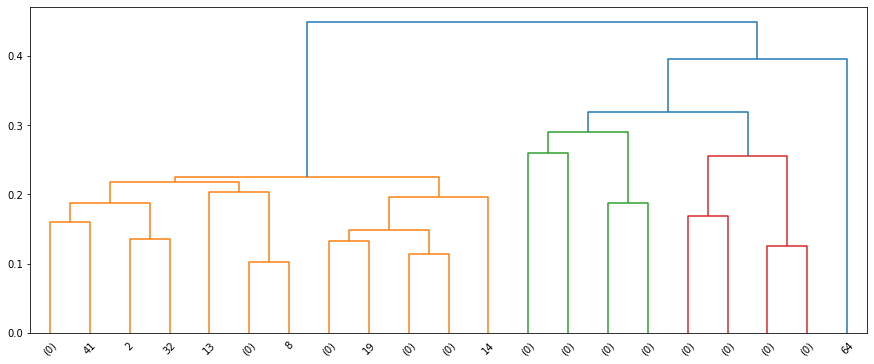

In [30]:
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

fig = plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.show()

### Сравнение разных подтипов

In [31]:
def sklearn_example():
    import time
    import warnings

    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn import cluster, datasets
    from sklearn.preprocessing import StandardScaler
    from itertools import cycle, islice
    
    warnings.filterwarnings("ignore")

    np.random.seed(0)
    
    n_samples = 1500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                          noise=.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None

    # Anisotropicly distributed data
    random_state = 170
    X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    # blobs with varied variances
    varied = datasets.make_blobs(n_samples=n_samples,
                                 cluster_std=[1.0, 2.5, 0.5],
                                 random_state=random_state)
    
    
    # Set up cluster parameters
    plt.figure(figsize=(9 * 0.6 + 2, 6.5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1

    default_base = {'n_neighbors': 10,
                    'n_clusters': 3}

    datasets = [
        (noisy_circles, {'n_clusters': 2}),
        (noisy_moons, {'n_clusters': 2}),
        (varied, {'n_neighbors': 2}),
        (aniso, {'n_neighbors': 2}),
        (blobs, {}),
        (no_structure, {})]

    for i_dataset, (dataset, algo_params) in enumerate(datasets):
        # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)

        X, y = dataset

        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # ============
        # Create cluster objects
        # ============
        ward = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='ward')
        complete = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='complete')
        average = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='average')
        single = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='single')

        clustering_algorithms = (
            ('Single', single),
            ('Average', average),
            ('Complete', complete),
            ('Ward', ward),
        )

        for name, algorithm in clustering_algorithms:
            t0 = time.time()

            # catch warnings related to kneighbors_graph
            with warnings.catch_warnings():
                warnings.filterwarnings(
                    "ignore",
                    message="the number of connected components of the " +
                    "connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.",
                    category=UserWarning)
                algorithm.fit(X)

            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)

            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

            plt.xlim(-2.5, 2.5)
            plt.ylim(-2.5, 2.5)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1

    plt.show()

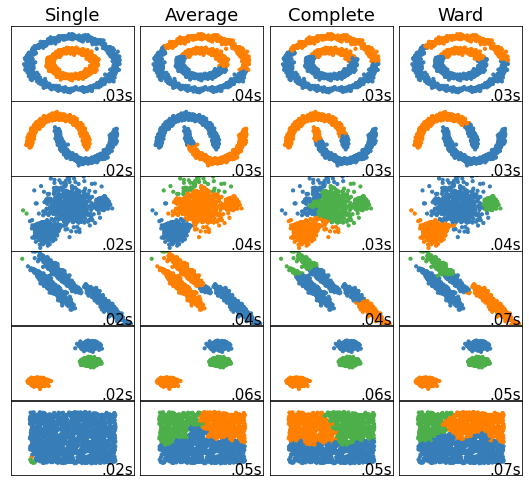

In [32]:
sklearn_example()

## Пример из sklearn

In [33]:
def sklearn_example():
    import time
    import warnings

    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn import cluster, datasets, mixture
    from sklearn.neighbors import kneighbors_graph
    from sklearn.preprocessing import StandardScaler
    from itertools import cycle, islice
    
    warnings.filterwarnings("ignore")

    np.random.seed(0)

    # ============
    # Generate datasets. We choose the size big enough to see the scalability
    # of the algorithms, but not too big to avoid too long running times
    # ============
    n_samples = 1500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                          noise=.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None

    # Anisotropicly distributed data
    random_state = 170
    X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    # blobs with varied variances
    varied = datasets.make_blobs(n_samples=n_samples,
                                 cluster_std=[1.0, 2.5, 0.5],
                                 random_state=random_state)

    # ============
    # Set up cluster parameters
    # ============
    plt.figure(figsize=(9 * 2 + 3, 12.5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1

    default_base = {'quantile': .3,
                    'eps': .3,
                    'damping': .9,
                    'preference': -200,
                    'n_neighbors': 10,
                    'n_clusters': 3,
                    'min_samples': 20,
                    'xi': 0.05,
                    'min_cluster_size': 0.1}

    datasets = [
        (noisy_circles, {'damping': .77, 'preference': -240,
                         'quantile': .2, 'n_clusters': 2,
                         'min_samples': 20, 'xi': 0.25}),
        (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
        (varied, {'eps': .18, 'n_neighbors': 2,
                  'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
        (aniso, {'eps': .15, 'n_neighbors': 2,
                 'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
        (blobs, {}),
        (no_structure, {})]

    for i_dataset, (dataset, algo_params) in enumerate(datasets):
        # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)

        X, y = dataset

        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # estimate bandwidth for mean shift
        bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

        # connectivity matrix for structured Ward
        connectivity = kneighbors_graph(
            X, n_neighbors=params['n_neighbors'], include_self=False)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # ============
        # Create cluster objects
        # ============
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
        ward = cluster.AgglomerativeClustering(
            n_clusters=params['n_clusters'], linkage='ward',
            connectivity=connectivity)
        spectral = cluster.SpectralClustering(
            n_clusters=params['n_clusters'], eigen_solver='arpack',
            affinity="nearest_neighbors")
        dbscan = cluster.DBSCAN(eps=params['eps'])
        optics = cluster.OPTICS(min_samples=params['min_samples'],
                                xi=params['xi'],
                                min_cluster_size=params['min_cluster_size'])
        affinity_propagation = cluster.AffinityPropagation(
            damping=params['damping'], preference=params['preference'])
        average_linkage = cluster.AgglomerativeClustering(
            linkage="average", affinity="cityblock",
            n_clusters=params['n_clusters'], connectivity=connectivity)
        birch = cluster.Birch(n_clusters=params['n_clusters'])
        gmm = mixture.GaussianMixture(
            n_components=params['n_clusters'], covariance_type='full')

        clustering_algorithms = (
            ('MiniBatchKMeans', two_means),
            ('AffinityPropagation', affinity_propagation),
            ('MeanShift', ms),
            ('SpectralClustering', spectral),
            ('Ward', ward),
            ('AgglomerativeClustering', average_linkage),
            ('DBSCAN', dbscan),
            ('OPTICS', optics),
            ('Birch', birch),
            ('GaussianMixture', gmm)
        )

        for name, algorithm in clustering_algorithms:
            t0 = time.time()

            # catch warnings related to kneighbors_graph
            with warnings.catch_warnings():
                warnings.filterwarnings(
                    "ignore",
                    message="the number of connected components of the " +
                    "connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.",
                    category=UserWarning)
                warnings.filterwarnings(
                    "ignore",
                    message="Graph is not fully connected, spectral embedding" +
                    " may not work as expected.",
                    category=UserWarning)
                algorithm.fit(X)

            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)

            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
            # add black color for outliers (if any)
            colors = np.append(colors, ["#000000"])
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

            plt.xlim(-2.5, 2.5)
            plt.ylim(-2.5, 2.5)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1

    plt.show()

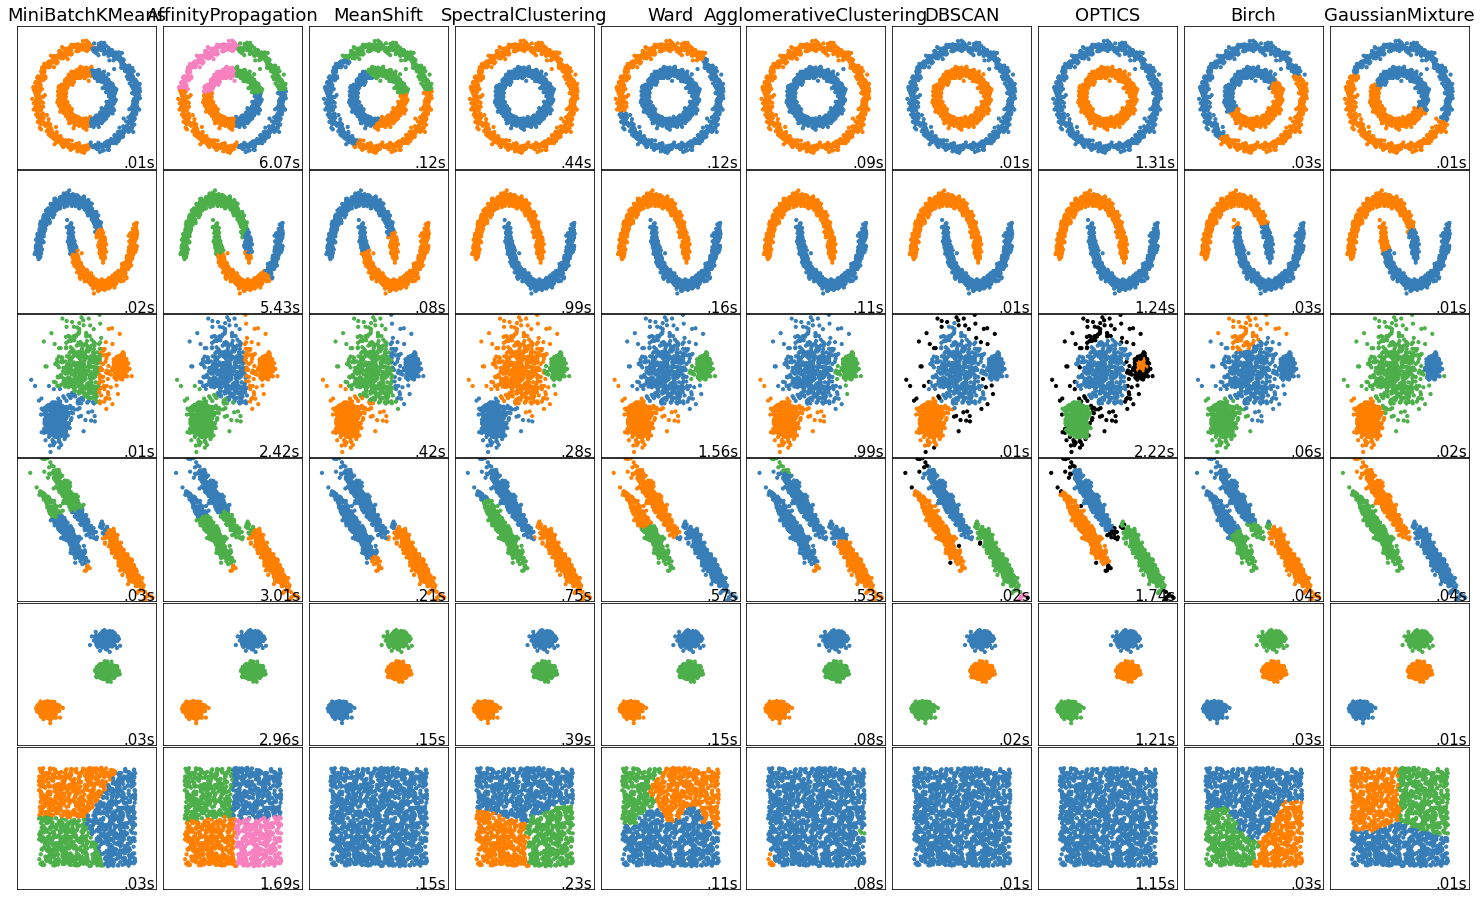

In [34]:
sklearn_example()

## Частичное обучение

Дано:
- $X^k = \{x_1, \cdots, x_l\}$ --- размеченные объекты метками $\{y_1, \cdots, y_k\}$
- $U= \{x_{k+1}, \cdots, x_l\}$ --- неразмеченные объекты.

Требуется построить алгоритм $a: X \to Y$.

### Self-training, 1970

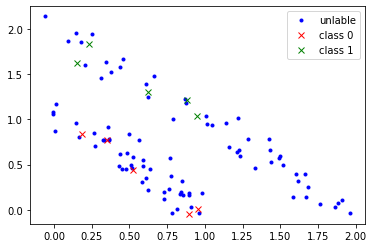

In [35]:
np.random.seed(0)
l = 50
X_1 = np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)

U = np.vstack([X_1[:45], X_2[:45]])
Y = np.hstack([np.zeros(len(X_1[45:]), dtype=int), 
               np.ones(len(X_2[45:]), dtype=int)])
X = np.vstack([X_1[45:], X_2[45:]])


_ = plt.plot(U[:, 0], U[:, 1], '.', color=colors[0], label='unlable')
for i in np.unique(Y):
    _ = plt.plot(X[Y==i, 0], X[Y==i, 1], 'x', color=colors[i+1], label='class {}'.format(i))
    
plt.legend(loc='best')
plt.show()

In [36]:
threshold = 0.85
models = []
datas = []
used_indexes = set()
classes = np.array([], dtype=int)

for i in range(16):
    X_new = np.vstack([X, U[list(used_indexes)]])
    Y_new = np.hstack([Y, classes[list(used_indexes)]])
    datas.append((X_new, Y_new, list(used_indexes), list(classes)))
    models.append(SVC(probability=True, kernel='linear').fit(X_new, Y_new))

    probas = models[-1].predict_proba(U)
    classes = np.array(models[-1].predict(U), dtype=int)
    
    used_indexes |= set(np.where(np.max(probas, axis=1) > threshold)[0])

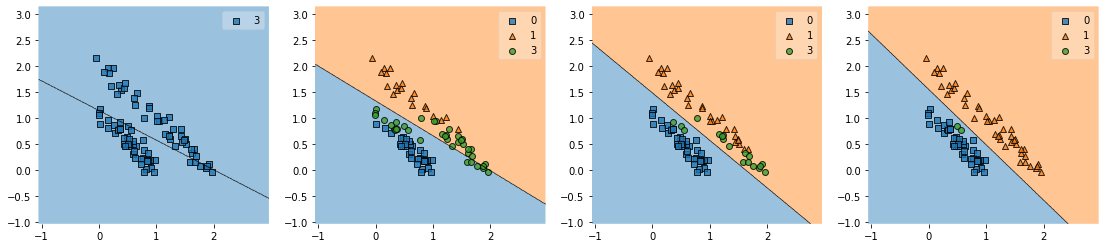

In [37]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
factor = 2
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))
    X_plot = U
    Y_plot = 3*np.ones(len(U), dtype=int)
    Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
    plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[i])

plt.show()

## Работа с неразмеченными данными

### Постановка

Сейчас данных много. Модели стали сложные. В глубоком обучении также пытаються использовать неразмеченные данные. Общий подход к данной задачи следующий:

- $\mathcal{U} \subset \mathcal{X}$ --- большая неразмеченная выборка
- $\mathcal{D} \subset  \mathcal{X}\times \mathcal{Y}$ --- небольшая размеченная выборка
- требуется построить отображение $f: \mathcal{X} \to \mathcal{Y}$


#### Суперпозиция
Предположение $f = c \circ h$ --- отображение есть суперпозия двух функций:
- $h$ --- генерация признакового описания $h: \mathcal{X} \to \mathcal{H}$;
- $c$ --- классификатор $c: \mathcal{H} \to \mathcal{Y}$.


Заметим, что $c$ и $h$ например это некоторое параметрические функции, параметры которых нужно найти.

Простой пример:
- $h$ --- все слои полносвязного многослойного перцептрона;
- $c$ --- последний слой.

Обычно $h$ является сложной моделью, а $c$ --- линейной.

### Полносвязная нейронная сеть (Персептрон)
![](../sem3/fig2.png)

### Разложили в суперпозицию, что теперь?

Найдем сначала функцию $h$:
- Автоэнкодер (следующий семестр);
- Решим вспомагательную задачу на неразмеченных данных;

Имея $h$ найдем $c$:
- решаем, простую задачу оптимизаци для размеченных данных.


### Нахождения $h$
Поставим вспомагательную задачу:
- рассмотрим некоторую функцию $\mu': \mathcal{X} \to \mathcal{Y}',$ которая нам известна!
- получим выборку $\mathcal{D} = \left(U,\mu'\bigr(U\bigr) \right)$ --- большая размеченная колекция
- найдем фукнцию $f': \mathcal{X} \to \mathcal{Y}'$, где $f' = c' \circ h$.

Проблемы:
- Выбор функции $\mu'$.

### Задача оптимизации
Первый вариант:
$$
    \sum_{i=1}^{l} q(u_i, y_i', c', h) \to \min_{c', h},
$$
$$
    \sum_{i=1}^{k} q(x_i, y_i, c, h) \to \min_{c},
$$

Второй вариант:
$$
    \lambda\sum_{i=1}^{l} q(u_i, y_i', c', h) + \left(1-\lambda\right)\sum_{i=1}^{k} q(x_i, y_i, c, h) \to \min_{c, h, c'},
$$
где $\lambda \in [0, 1]$